In [42]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
df = pd.read_csv('iris.data', 
                 skiprows=0, 
                 names=['sepal_length',
                       'sepal_width',
                       'petal_length',
                       'petal_width',
                       'class'])
# 10 random values from the dataset
df.sample(10, random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,class
14,5.8,4.0,1.2,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
16,5.4,3.9,1.3,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
56,6.3,3.3,4.7,1.6,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
44,5.1,3.8,1.9,0.4,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa
120,6.9,3.2,5.7,2.3,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
df.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


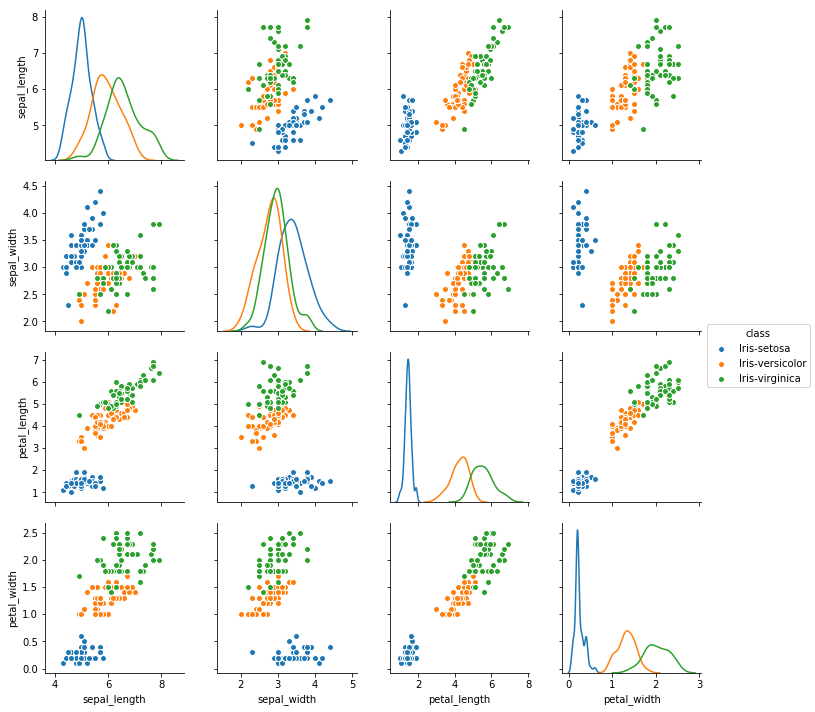

In [7]:
sns.pairplot(df, diag_kind='kde',hue='class') 

In [8]:
#####################################################
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)  
# imputer.fit(df[:,1:3])

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [9]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
df['class'] = labelencoder_X.fit_transform(df['class'])
df.sample(5,random_state=1)

,sepal_length,sepal_width,petal_length,petal_width,class
14,5.8,4.0,1.2,0.2,0
98,5.1,2.5,3.0,1.1,1
75,6.6,3.0,4.4,1.4,1
16,5.4,3.9,1.3,0.4,0
131,7.9,3.8,6.4,2.0,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

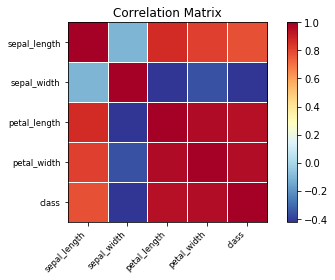

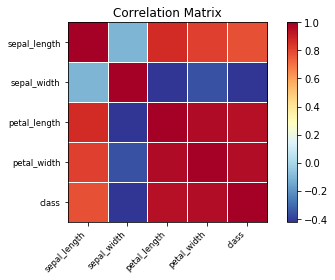

In [11]:
import statsmodels.graphics.api as smg
smg.plot_corr(df.corr(),xnames=list(df.corr().columns))

In [12]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [13]:
corr = (df.corr()['class'].abs() < 0.1).to_frame() 
corr

,class
sepal_length,False
sepal_width,False
petal_length,False
petal_width,False
class,False


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [14]:
df.var() < 0.1

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
class           False
dtype: bool

## Question 6

*Plot the scatter matrix for all the variables.*

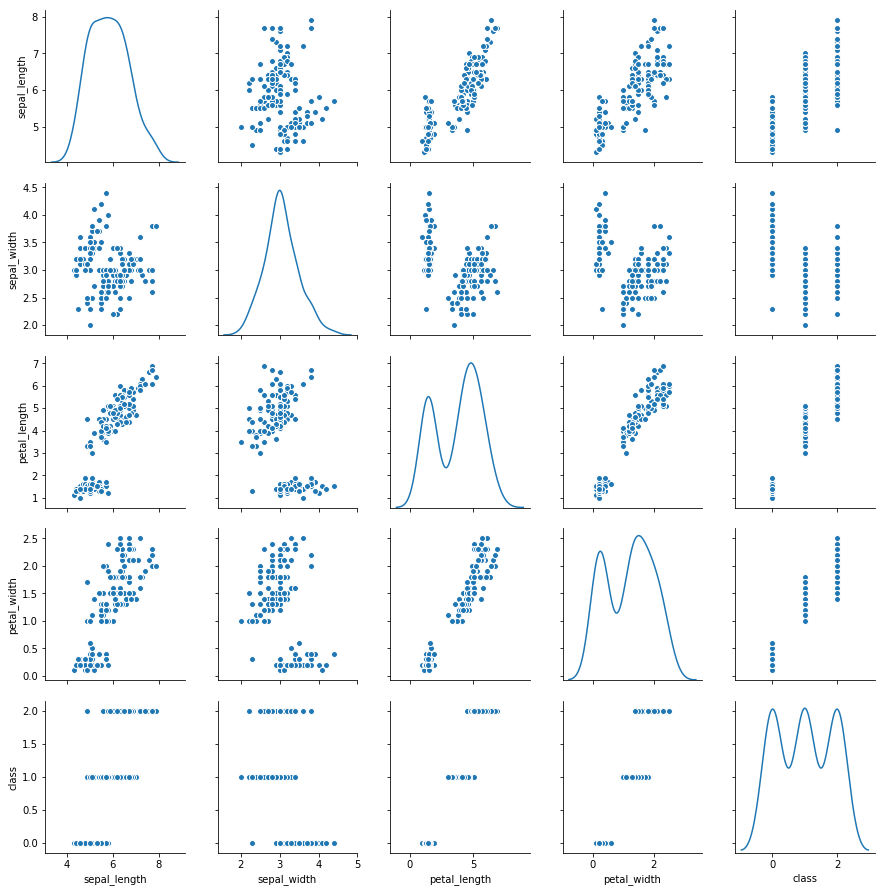

In [15]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde')
# Kindly also refer to question 2

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
y = df[['class']]
X = df.drop('class',axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=1)

In [18]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [44]:
import numpy as np
acc_score={}
from sklearn.model_selection import cross_val_score
for i in [3,5,9]:
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    NNH.fit(X_train, y_train)
    predict_labels = NNH.predict(X_test)
    acc_score[i] = accuracy_score(y_test,predict_labels)
    
    
print('Accuracy scores for k = 3,5,9 are respectively', acc_score)

Accuracy scores for k = 3,5,9 are respectively {3: 1.0, 5: 1.0, 9: 0.9666666666666667}


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [43]:
import numpy as np
mse={}
cv_scores=[]
from sklearn.model_selection import cross_val_score
for i in (np.arange(1,20,2,dtype='int')):
    NNH = KNeighborsClassifier(n_neighbors= i , weights = 'distance')
    scores = cross_val_score(NNH, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    mdf=1 -NNH.score(X_test, y_test)
    mse[i] = mdf
    
print(mse)

{1: 0.0, 3: 0.0, 5: 0.0, 7: 0.033333333333333326, 9: 0.033333333333333326, 11: 0.033333333333333326, 13: 0.033333333333333326, 15: 0.033333333333333326, 17: 0.033333333333333326, 19: 0.033333333333333326}


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

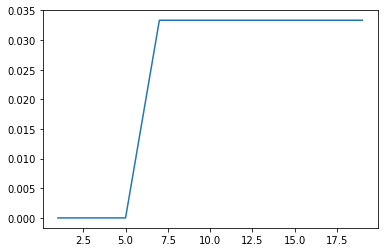

In [21]:
import matplotlib.pyplot as plt

x = mse.keys()
y = mse.values()

plt.plot(x,y)
plt.show()

# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [22]:
df_mat = pd.read_csv('student-mat.csv', 
                 sep=";")
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [23]:
df_mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Question 2 - drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [24]:
df_mat.index.name = 'number'

In [25]:
df_mat.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


In [26]:
df_mat.isna().any() #Looks like there are no na values

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [27]:
df_mat.shape

(395, 33)

In [28]:
df_mat.dropna(axis=0,inplace=True)

In [29]:
df_mat.shape

(395, 33)

# Transform Data

## Question 3

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [30]:
df_mat.select_dtypes(exclude=np.number).columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

# Question 4 - Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [31]:
(df_mat.var() < 1)

age           False
Medu          False
Fedu          False
traveltime     True
studytime      True
failures       True
famrel         True
freetime       True
goout         False
Dalc           True
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [32]:
k = (df_mat.var() < 1)
k[k == True].index.tolist()

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']

In [33]:
df_mat = df_mat.drop((k[k == True].index.tolist()), axis=1)
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [34]:
df_mat.shape

(395, 27)

#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 5 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [35]:
# from sklearn.preprocessing import LabelEncoder
# df_mat.apply(LabelEncoder().fit_transform).head(10)

In [36]:
df_mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10


In [37]:
column_list = df_mat.select_dtypes(exclude=np.number).columns.tolist()

In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

for col in column_list:
    df_mat[col] = labelencoder_X.fit_transform(df_mat[col])
df_mat.sample(5,random_state=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
146,0,0,15,1,0,1,3,2,1,3,...,1,1,0,2,1,3,0,6,7,0
379,1,0,17,0,0,1,3,1,0,2,...,1,1,0,4,3,1,17,10,10,10
247,0,1,22,1,0,1,3,1,3,3,...,0,1,1,5,5,1,16,6,8,8
197,0,1,16,0,1,1,3,3,4,2,...,1,1,0,4,5,3,8,9,9,10
368,1,0,18,1,0,1,2,3,0,3,...,1,1,1,3,2,4,0,11,10,10


# Question 6 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [39]:
for col in ['G1', 'G2', 'G3']:
    df_mat[col] = df_mat[col].apply(lambda x: 1 if x >= 10 else 0)

In [40]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,0,0,0
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,0,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,0,0,1
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,1,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,0,1,1


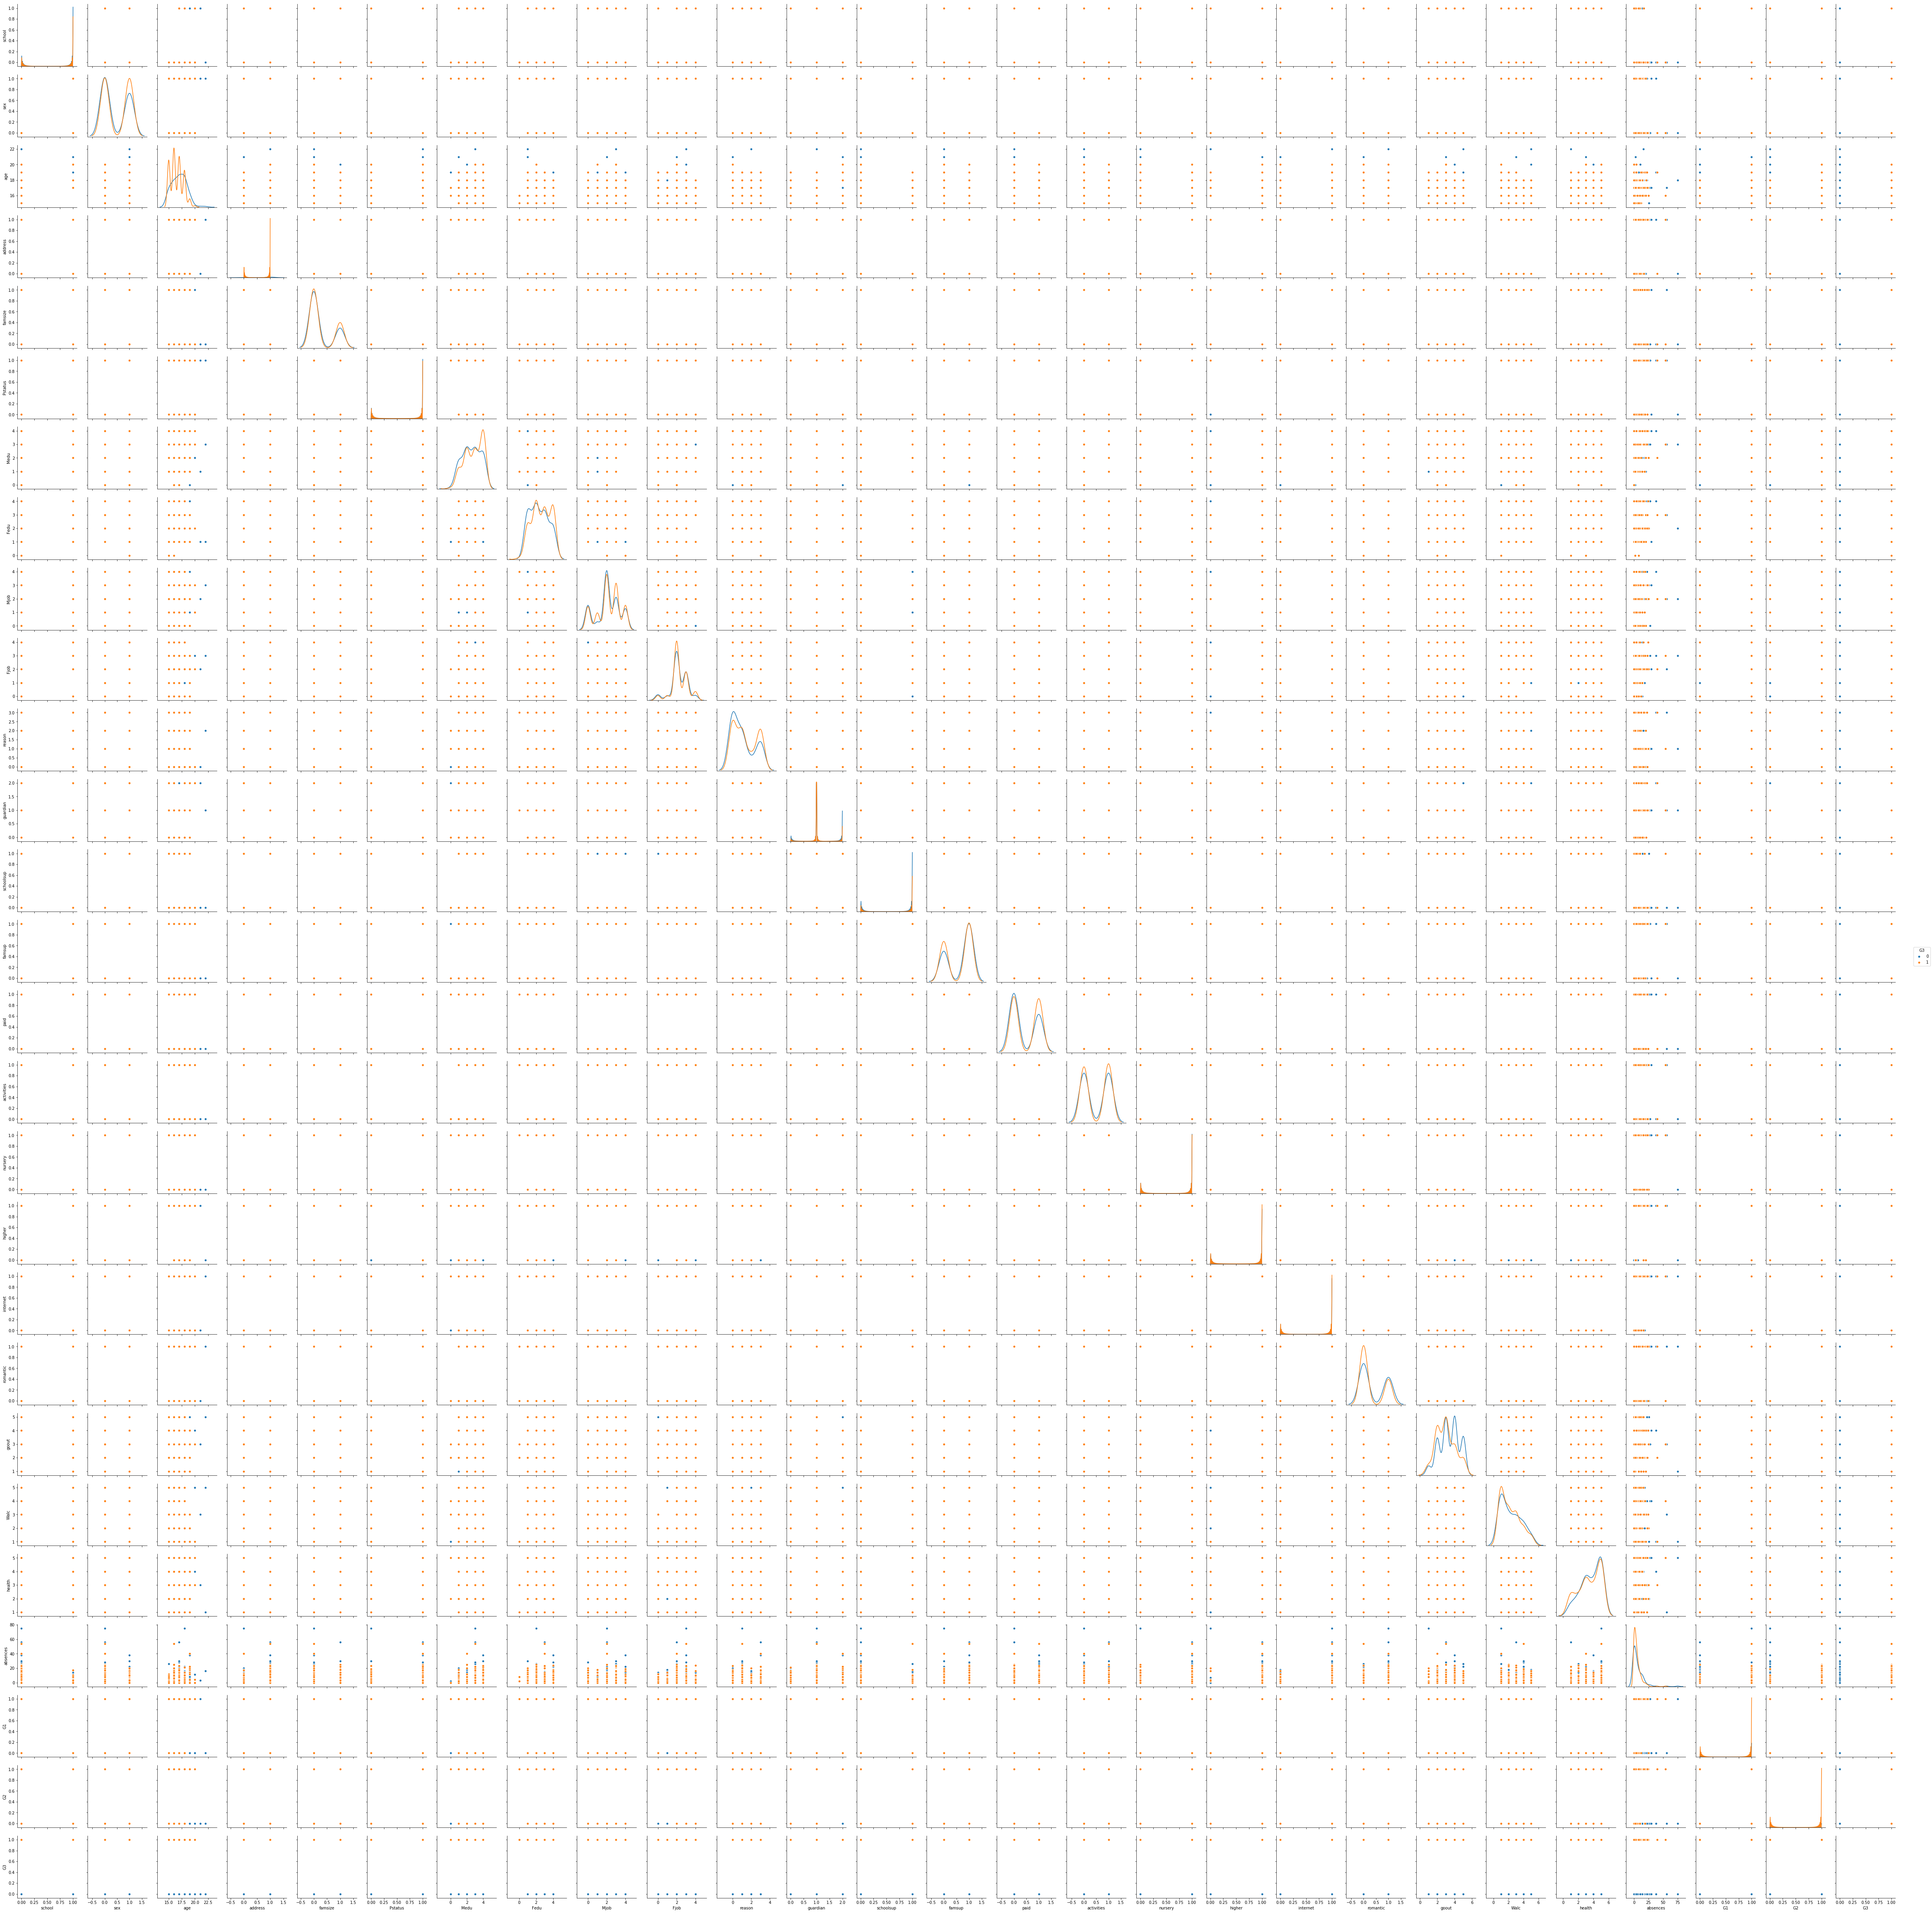

In [98]:
sns.pairplot(df_mat, diag_kind='kde',hue='G3') 

# Question 7

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

Answer

In [49]:
X = df_mat.drop('G3',axis=1)
y = df_mat[['G3']]
(X.shape, y.shape)

((395, 26), (395, 1))

# Question 8 - Training and testing data split

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [50]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 300, random_state=seed)

In [51]:
X_train.shape, X_test.shape

((300, 26), (95, 26))

# Question 9 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [57]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)

predict_labels = model.predict(X_test)
acc_score = accuracy_score(y_test,predict_labels)
print(acc_score)

0.9578947368421052


# Question 10 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [59]:
model.intercept_[0]

0.513665265798326

# Question 11 - Print the coefficients of the model and name the coefficient which has the highest impact on the dependent variable

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [86]:
coefs = pd.DataFrame(model.coef_[0],X_train.columns,columns=['coef_value'])
coefs

,coef_value
school,0.280522
sex,0.113648
age,-0.166341
address,0.140821
famsize,-0.096909
Pstatus,-0.433451
Medu,0.194216
Fedu,-0.484775
Mjob,0.049399
Fjob,0.238838


In [94]:
coefs[coefs['coef_value'].abs()==coefs['coef_value'].abs().max()]

,coef_value
G2,3.573639


# Question 12 - Predict the dependent variable for both training and test dataset

Accuracy score() should help you to print the accuracies

In [96]:
predict_labels = model.predict(X_train)
acc_score = accuracy_score(y_train,predict_labels)
print('Training dataset accuracy:', acc_score)

0.9066666666666666


In [97]:
predict_labels = model.predict(X_test)
acc_score = accuracy_score(y_test,predict_labels)
print('Test dataset accuracy:', acc_score)

Test dataset accuracy: 0.9578947368421052
